In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import solve_ivp

# Métodos de Runge-Kutta 

## Algoritmo de Runge-Kutta de segundo orden

$$y_{i+1} = y_i + \dfrac{h}{2}\left[f(x_i,y_i) + f(x_i+h,y_i+hf(x_i,y_i))\right]$$

o bien 

$$\begin{align*}
y_{i+1} &= y_i + \dfrac{h}{2}(k_0 + k_1)\\
k_0 &=  f(x_i,y_i)\\
k_1 &= f(x_i+h,y_i+hk_0)
\end{align*}$$

<img src="https://drive.google.com/uc?id=1r-xeI_PikigavVEgWRvGQ1jDsfnVKv_7&export=download" width="100%">

## Algoritmo de Runge-kutta de cuarto orden (RK-4)

$$\begin{align*}
y_{i+1} &= y_i + \dfrac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\
k_1 &= f(x_i,y_i)\\
k_2 &= f(x_i+h/2,y_i+hk_1/2)\\
k_3 &= f(x_i+h/2,y_i+hk_2/2)\\
k_4 &= f(x_i+h,y_i+hk_3)
\end{align*}$$


**Ejemplo**

Resuelva el siguiente PVI mediante el método de Runge-Kutta de Cuarto Orden (RK-4)

$$\begin{align*} 
\dfrac{dy}{dx}&=(x-y) \\ 
y(0)&=2\\
y(1)&=? 
\end{align*} 
$$

In [18]:
# Condiciones iniciales
x0, xf = 0, 1
y0 = 2.0
# Dividir el intervalo [x0,xf] en n subintervalos
n = 5
h = (xf-x0)/n

Aplicamos 



$$\begin{align*}
y_{i+1} &= y_i + \dfrac{h}{6}(k_1 + 2k_2 + 2k_3 + k_)\\
k_1 &= f(x_i,y_i)\\
k_2 &= f(x_i+h/2,y_i+hk_1/2)\\
k_3 &= f(x_i+h/2,y_i+hk_2/2)\\
k_4 &= f(x_i+h,y_i+hk_3)\\
x_i &= x_0 +ih,\,0\leq i\leq n
\end{align*}$$

In [19]:
# Creamos las funciones
def f(x,y):
  return x-y

In [20]:
yRK4 = np.zeros(n+1)    # Creamos un arreglo yT para almacenar las aproximaciones por el método de Taylor
x = np.zeros_like(yRK4)
x[0] = x0
yRK4[0] = y0
for i in range(1,n+1): # Creamos un ciclo para realizar los calculos, el ciclo va desde i = 0 hasta n+1
    x[i] = x[i-1] + h
    
    k1 = f(x[i-1],yRK4[i-1])
    k2 = f(x[i-1] + h/2, yRK4[i-1] + h*k1/2)
    k3 = f(x[i-1] + h/2, yRK4[i-1] + h*k2/2)
    k4 = f(x[i-1] + h, yRK4[i-1] + h*k3)
    
    yRK4[i] = yRK4[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)


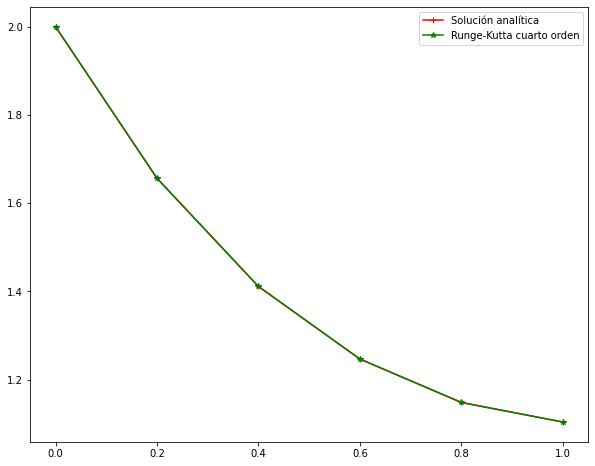

In [22]:
solA = lambda x: ((x - 1.0)*np.exp(x) + 3)*np.exp(-x)
plt.figure(figsize=(10,8))
plt.plot(x,solA(x),color="red", linestyle="solid", marker = "+")
plt.plot(x,yRK4,color="green", linestyle="solid", marker = "*")
plt.legend(["Solución analítica","Runge-Kutta cuarto orden"])
plt.show()

# Metodos de predicción-corrección

## Corrector basado en el método trapezoidal

Se tiene que llegar al esquema iterativo del método de Euler modificado

$$y_{i+1} = y_i + \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1}) \right]$$

Recordando que la solución analítica de la ecuación diferencial es

$$y = F(x)$$

y que 

$$F'(x) = f(x,y)$$

La integral con respecto a $x$ de la ecuación anterior es

$$\int F'(x)dx = F(x) = \int f(x,y)dx$$

Integrando $\int f(x,y)dx$ en el intervalo $[x_i,x_{i+1}]$

$$\begin{align*}
\int_{x_i}^{x_{i+1}} f(x,y)dx &= F(x)|_{x_i}^{x_{i+1}}\\
& = F(x_{i+1})-F(x_i)\approx y_{i+1}-y_i
\end{align*}$$

donde $y_i$ y  $y_{i+1}$  son aproximaciones a $F(x_i)$ y $F(x_{i+1})$.

Integrando $\int f(x,y)dx$ con el método trapezoidal, se tiene

$$\int_{x_i}^{x_{i+1}}f(x,y)dx\approx \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]$$

donde $h = x_{i+1}-x_i$ 

Haciendo 

$$\begin{align*}
y_{i+1}-y_i &= \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]\,\text{resolviendo para }y_{i+1}\\
y_{i+1} &= y_i + \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]\\
\bar{y}_{i+1} &= y_i + hf(x_i,y_i)
\end{align*}$$

O bien 

$$\begin{align*}
y_{i+1} &= y_i + \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},y_i + hf(x_i,y_i))\right]\\
\end{align*}$$


## Corrector basado en el método de Simpson 1/3

Se parte de 

$$\int_{x_{i-1}}^{x_{i+1}}f(x,y)dx = F(x_{i+1})-F(x_{i-1})\approx y_{i+1} - y_{i-1}$$

Utilizando el método de Simpson para integrar $\int_{x_{i-1}}^{x_{i+1}}f(x,y)dx $

$$\int_{x_{i-1}}^{x_{i+1}}f(x,y)dx  \approx \dfrac{h}{3}\left[f(x_{i-1},y_{i-1})+ 4f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]$$

Igualando las integrales y resolviendo para $y_{i+1}$

$$y_{i+1} = y_{i-1} + \dfrac{h}{3}\left[f(x_{i-1},y_{i-1})+ 4f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]$$

$$\bar{y}_{i+1} = y_i + hf(x_i,y_i)$$

**Aplicación**

Partiendo de la condición inicial $(x_0,y_0)$, se tiene que la primera iteración, $i=1$, está dada por 

$$y_2 = y_0 + \dfrac{h}{3}\left[f(x_0,y_0) +4f(x_1,y_1) + f(x_2,\bar{y}_2)  \right]$$

donde $\bar{y}_2$ se estima a través de un predictor, el cual requiere del valor de $y_1$ y $f(x_1,y_1)$. A esto se le conoce como paso de inicialización.

**Ejemplo**

Resuelva el siguiente PVI mediante el método de corrector de Simpson 1/3

$$\begin{align*} 
\dfrac{dy}{dx}&=(x-y) \\ 
y(0)&=2\\
y(1)&=? 
\end{align*} 
$$